In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Enable inline plotting for Jupyter Notebooks
%matplotlib inline


In [8]:
# Define paths to the full dataset
links_path = './../../data/processed/buyer_seller_links.csv'
id_degree_path = './../../data/analysis/id_degree_distribution.csv'
vat_degree_path = './../../data/analysis/vat_degree_distribution.csv'

# Load the datasets
links_df = pd.read_csv(links_path)
id_degree_df = pd.read_csv(id_degree_path)
vat_degree_df = pd.read_csv(vat_degree_path)


In [9]:
# Group by ID and VAT to get the assortativity info
assortativity_df = links_df.groupby(['ID', 'VAT']).agg({'VART': 'sum'}).reset_index()

# Merge with ID and VAT degree information
assortativity_df = assortativity_df.merge(id_degree_df, on='ID', how='left')
assortativity_df = assortativity_df.merge(vat_degree_df, on='VAT', how='left')


In [10]:
import numpy as np
import networkx as nx

def calculate_assortativity(df, id_col, vat_col):
    """
    Calculate the assortativity coefficient of a network based on a given DataFrame.
    Args:
    - df: DataFrame containing the network data.
    - id_col: Column name for the IDs (e.g., 'ID_degree').
    - vat_col: Column name for the VATs (e.g., 'VAT_degree').

    Returns:
    - assortativity_coefficient: The assortativity coefficient of the network.
    """

    # Create a graph from the DataFrame
    G = nx.Graph()

    # Add edges to the graph from the DataFrame
    for index, row in df.iterrows():
        G.add_edge(row[id_col], row[vat_col])

    # Calculate the assortativity coefficient
    assortativity_coefficient = nx.degree_pearson_correlation_coefficient(G)

    return assortativity_coefficient

# Example usage:
# assortativity_coefficient = calculate_assortativity(assort_s, 'ID_degree', 'VAT_degree')


# Compute the assortativity
assortativity_coefficient = calculate_assortativity(assortativity_df, 'ID_degree', 'VAT_degree')
print(f'Assortativity Coefficient: {assortativity_coefficient}')


Assortativity Coefficient: -0.5446863094288391


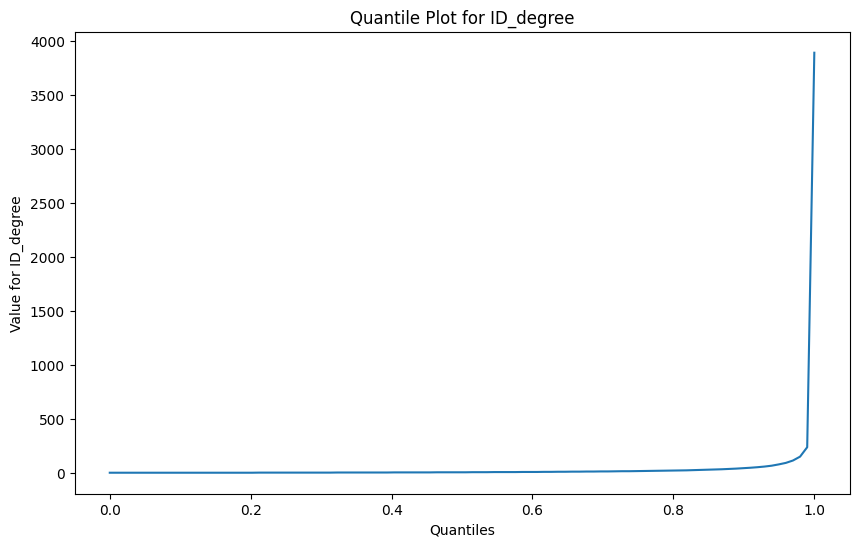

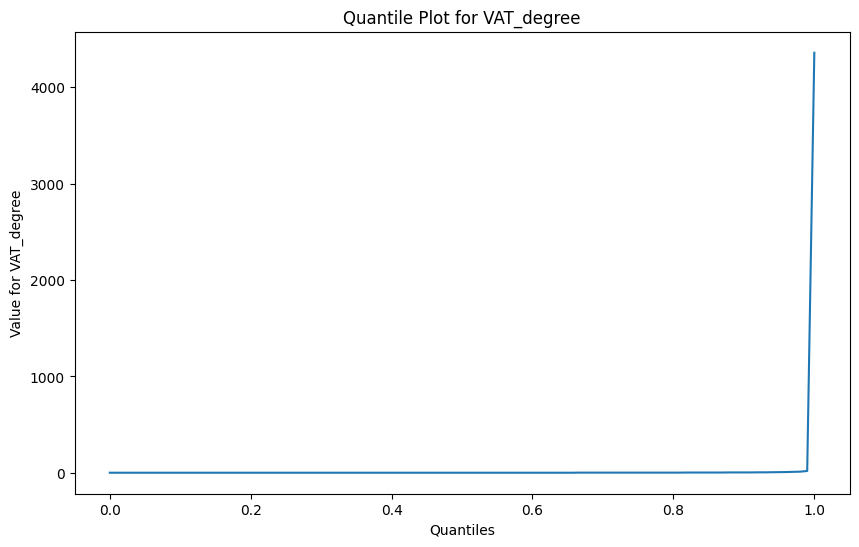

In [11]:
# Quantile plot of ID degrees
def plot_quantile(df, column, quantiles):
    plt.figure(figsize=(10, 6))
    quantile_values = df[column].quantile(quantiles)
    sns.lineplot(x=quantiles, y=quantile_values)
    plt.xlabel('Quantiles')
    plt.ylabel(f'Value for {column}')
    plt.title(f'Quantile Plot for {column}')
    plt.show()

# Call the function for ID degrees
plot_quantile(id_degree_df, 'ID_degree', np.linspace(0, 1, num=100))

# Call the function for VAT degrees
plot_quantile(vat_degree_df, 'VAT_degree', np.linspace(0, 1, num=100))


In [13]:

def plot_vart_accumulation_quantile(df, degree_col, vart_col, quantiles):
    # Calculate cumulative VART
    df_sorted = df.sort_values(by=degree_col)
    df_sorted['cumulative_vart'] = df_sorted[vart_col].cumsum()
    total_vart = df_sorted['cumulative_vart'].iloc[-1]

    # Calculate VART accumulation quantiles
    quantile_values = df_sorted['cumulative_vart'].quantile(quantiles) / total_vart

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=quantiles, y=quantile_values)
    plt.xlabel('Quantiles')
    plt.ylabel(f'Accumulated VART for {degree_col}')
    plt.title(f'VART Accumulation Quantile Plot for {degree_col}')
    plt.show()

# Define the quantiles to use
quantiles = np.linspace(0, 1, num=100)

# Call the function for ID degrees
plot_vart_accumulation_quantile(id_degree_df, 'ID_degree', 'VART', quantiles)

# Call the function for VAT degrees
plot_vart_accumulation_quantile(vat_degree_df, 'VAT_degree', 'VART', quantiles)


KeyError: 'VART'

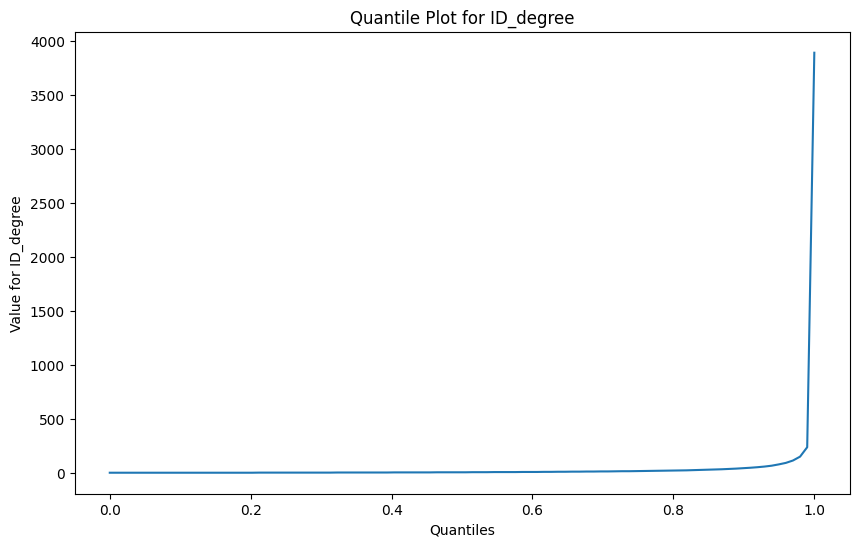

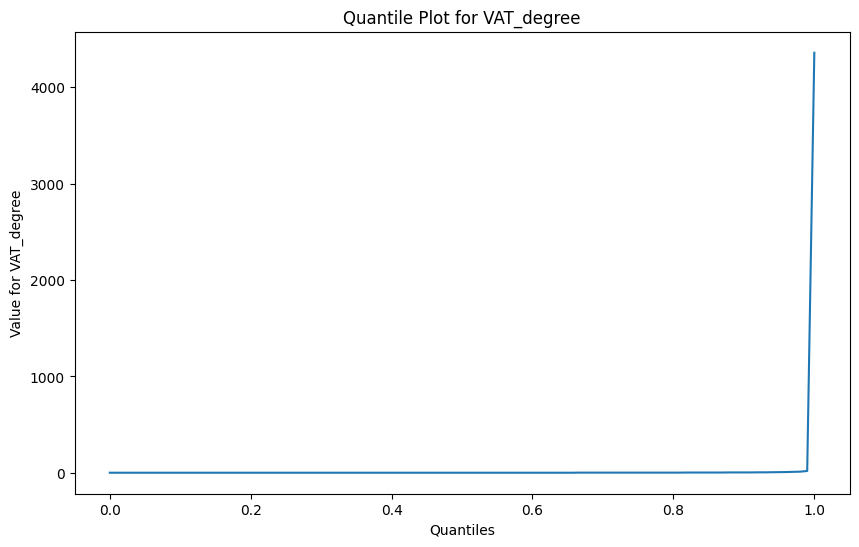

In [12]:
# Save the assortativity dataframe to a CSV
assortativity_df.to_csv('./../../data/analysis/assortativity.csv', index=False)

# Save quantile plots
def save_quantile_plot(df, column, quantiles, filename):
    fig, ax = plt.subplots(figsize=(10, 6))
    quantile_values = df[column].quantile(quantiles)
    sns.lineplot(x=quantiles, y=quantile_values, ax=ax)
    ax.set_xlabel('Quantiles')
    ax.set_ylabel(f'Value for {column}')
    ax.set_title(f'Quantile Plot for {column}')
    fig.savefig(f'./../../data/analysis/{filename}.png', dpi=300)

save_quantile_plot(id_degree_df, 'ID_degree', np.linspace(0, 1, num=100), 'id_degree_quantile')
save_quantile_plot(vat_degree_df, 'VAT_degree', np.linspace(0, 1, num=100), 'vat_degree_quantile')
